# **TF-Keras 활용 딥러닝 학습**

## 의류 이미지 복원 실습

### import
일반적으로 코드에 필요한 라이브러리 import는 파일의 가장 상단에서 실행, 하지만 실습 설명상 필요한 곳에서 import 함

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


## 데이터 Pipeline 구축

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
print(train_images.shape)
print(len(train_labels))

In [ ]:
# train_images의 가장 첫 번째 이미지 확인

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# 8 bit 이미지는 0~255의 정수형 자료 활용, 딥러닝 모델이 학습하기 편한 0~1 범위로 변환
train_images = ...
test_images = ...

In [ ]:
# 차원 추가
train_images = ...
test_images = ...

## 모델 생성

In [ ]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Reshape

input = Input(shape = (28,28,1))

############## Encoder ###################
# 코드 작성
##########################################

############## Decoder ###################
# 코드 작성
##########################################

AE_model = Model(inputs = input, outputs = output)

In [ ]:
AE_model.compile(...)

## 훈련 및 평가

In [ ]:
history = AE_model.fit(train_images, train_images, batch_size=64, epochs=10, verbose=2)

In [ ]:
AE_images = AE_model.predict(test_images)
AE_images.shape

In [ ]:
num = 5
plt.figure(figsize=(20,8))

for i in range(num):
    # 원본 이미지
    ax = plt.subplot(2, num, i+1)
    plt.imshow(test_images[i].reshape((28,28)), cmap='gray')
    plt.title("Original %s" % str(i))
    plt.axis('off')

    # 복원 이미지
    ax = plt.subplot(2, num, i+num+1)
    plt.imshow(AE_images[i], cmap='gray')
    plt.title("Auto-encoded %s" % str(i))
    plt.axis('off')

plt.show()

# **Lane Line Binary Segmentation 실습**

In [1]:
# 데이터셋 다운로드
!wget lane_detection_dataset.zip https://www.dropbox.com/s/a3pvo5rukig1l5s/lane_detection_dataset.zip

--2023-11-28 07:38:03--  http://lane_detection_dataset.zip/
Resolving lane_detection_dataset.zip (lane_detection_dataset.zip)... failed: Name or service not known.
wget: unable to resolve host address ‘lane_detection_dataset.zip’
--2023-11-28 07:38:03--  https://www.dropbox.com/s/a3pvo5rukig1l5s/lane_detection_dataset.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/a3pvo5rukig1l5s/lane_detection_dataset.zip [following]
--2023-11-28 07:38:04--  https://www.dropbox.com/s/raw/a3pvo5rukig1l5s/lane_detection_dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3c2dc7fb6aefcd1767269be791.dl.dropboxusercontent.com/cd/0/inline/CIYLIzsNLEgQRwmMExJrrjjl1MolPvtlk2uTjsoB-HajrVbKYucstdGLXXEqhe1cr_33x0hbRnl486v837qZSuRpy3-EXkPaOX-

In [2]:
import os

# 폴더 생성
try:
     os.makedirs('/content/LaneDetection')
except:
  pass

os.chdir('/content/LaneDetection')
try:
    os.makedirs('data')
except:
    pass

In [3]:
# 압축해제
!unzip -q /content/lane_detection_dataset.zip -d /content/LaneDetection/data

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

SEED = 100

# ImageDataGenerator를 활용해 Train, Validation, Test용 데이터 불러오기

train_data_generator = ImageDataGenerator(rescale=1./255).flow_from_directory('./data/TrainData', batch_size = 8, target_size = (256, 512), seed = SEED, class_mode=None)

train_label_generator = ImageDataGenerator(rescale=1./255).flow_from_directory('./data/TrainLabel', batch_size = 8, target_size = (256, 512), seed = SEED, class_mode=None)

valid_data_generator = ImageDataGenerator(rescale=1./255).flow_from_directory('./data/ValidData', batch_size = 8, target_size = (256, 512), seed = SEED, class_mode=None)

valid_label_generator = ImageDataGenerator(rescale=1./255).flow_from_directory('./data/ValidLabel', batch_size = 8, target_size = (256, 512), seed = SEED, class_mode=None)

Found 4000 images belonging to 1 classes.
Found 4000 images belonging to 1 classes.
Found 1000 images belonging to 1 classes.
Found 1000 images belonging to 1 classes.


### Encoder Decoder 구조 사용하여 Segnet 구조와 유사한 LaneNet 모델 생성

In [6]:
from tensorflow import keras
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, UpSampling2D, Activation, Add

input = Input(shape = (256,512,3)) # 이미지의 크기와 3채널

# functional

# encoder1
input = Input(shape = (256,512,3))
enc1 = Conv2D(32, 3, padding = 'same', activation = 'relu')(input)
enc1 = BatchNormalization()(enc1)
enc1 = Conv2D(32, 3, padding = 'same', activation = 'relu')(enc1)
enc1 = BatchNormalization()(enc1)
enc1 = MaxPool2D(pool_size =(2,2), strides=(2,2), padding = 'same')(enc1)
enc1 = Conv2D(32, 3, padding = 'same', activation = 'relu')(enc1)
enc1 = BatchNormalization()(enc1) # 128*256*32

# encoder2
enc2 = Conv2D(64, 3, padding = 'same', activation = 'relu')(enc1)
enc2 = BatchNormalization()(enc2)
enc2 = Conv2D(64, 3, padding = 'same', activation = 'relu')(enc2)
enc2 = BatchNormalization()(enc2)
enc2 = MaxPool2D(pool_size =(2,2), strides=(2,2), padding = 'same')(enc2)
enc2 = Conv2D(64, 3, padding = 'same', activation = 'relu')(enc2)
enc2 = BatchNormalization()(enc2) # 64*128*64

# Residual1
res1 = Conv2D(128, 3, padding = 'same', activation = 'relu')(enc2)
res1 = BatchNormalization()(res1)
res1 = Conv2D(64, 3, padding = 'same', activation = 'relu')(res1)
res1 = BatchNormalization()(res1)
merge_data = Add()([res1, enc2])
res1 = Activation('relu')(merge_data) # 64*128*64

# Residual2
res2 = Conv2D(128, 3, padding = 'same', activation = 'relu')(res1)
res2 = BatchNormalization()(res2)
res2 = Conv2D(64, 3, padding = 'same', activation = 'relu')(res2)
res2 = BatchNormalization()(res2)
merge_data = Add()([res2, res1])
res2 = Activation('relu')(merge_data) # 64*128*64

# Decoder1
dec1 = Conv2D(32, 3, padding = 'same', activation = 'relu')(res2)
dec1 = BatchNormalization()(dec1)
dec1 = Conv2D(32, 3, padding = 'same', activation = 'relu')(dec1)
dec1 = BatchNormalization()(dec1)
dec1 = UpSampling2D(size=(2,2))(dec1)
dec1 = Conv2D(32, 3, padding = 'same', activation = 'relu')(dec1)
dec1 = BatchNormalization()(dec1) # 128*256*32

# Decoder2
dec2 = Conv2D(1, 3, padding = 'same', activation = 'relu')(dec1)
dec2 = BatchNormalization()(dec2)
dec2 = Conv2D(1, 3, padding = 'same', activation = 'relu')(dec2)
dec2 = BatchNormalization()(dec2)
dec2 = UpSampling2D(size=(2,2))(dec2)
dec2 = Conv2D(1, 3, padding = 'same')(dec2)
dec2 = BatchNormalization()(dec2)
predictions = Activation('sigmoid')(dec2) # 256*512*1
# sigmoid 함수 -> 이진분류에서 자주 사용

# LaneNet 모델 생성
model = Model(inputs = input, outputs = predictions)

In [7]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer = Adam(learning_rate = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 512, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 512, 32)         896       ['input_2[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 256, 512, 32)         128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 512, 32)         9248      ['batch_normalization[0][0

In [8]:
batch_size = 8 # 배치 사이즈 설정
steps_per_epoch = 4000//batch_size

validation_batch_size = 8
validation_steps = 1000//validation_batch_size

history = model.fit(zip(train_data_generator, train_label_generator), validation_data=zip(valid_data_generator,
valid_label_generator), epochs=10, batch_size=batch_size, steps_per_epoch=steps_per_epoch,
validation_batch_size = validation_batch_size, validation_steps = validation_steps) # batch size 실험 하기
# train, validation data를 이용하여 학습진행
# epoch 10으로 설정 # 누적 20

Epoch 1/10
500/500 [==============================] - 103s 162ms/step - loss: 0.6236 - accuracy: 0.8971 - val_loss: 0.5926 - val_accuracy: 0.9284
Epoch 2/10
500/500 [==============================] - 82s 164ms/step - loss: 0.5778 - accuracy: 0.9330 - val_loss: 0.5827 - val_accuracy: 0.9185
Epoch 3/10
500/500 [==============================] - 81s 163ms/step - loss: 0.5513 - accuracy: 0.9381 - val_loss: 0.5390 - val_accuracy: 0.9413
Epoch 4/10
500/500 [==============================] - 85s 170ms/step - loss: 0.5269 - accuracy: 0.9415 - val_loss: 0.5138 - val_accuracy: 0.9431
Epoch 5/10
500/500 [==============================] - 82s 165ms/step - loss: 0.5042 - accuracy: 0.9434 - val_loss: 0.4944 - val_accuracy: 0.9446
Epoch 6/10
500/500 [==============================] - 85s 170ms/step - loss: 0.4832 - accuracy: 0.9446 - val_loss: 0.4731 - val_accuracy: 0.9449
Epoch 7/10
500/500 [==============================] - 85s 170ms/step - loss: 0.4625 - accuracy: 0.9456 - val_loss: 0.4517 - val_a

In [11]:
# test data를 활용해 모델 성능 살펴보기
import tensorflow as tf

test_data_generator=ImageDataGenerator(rescale=1./255).flow_from_directory('./data/TestData', batch_size = 8, target_size = (256, 512), seed = SEED, class_mode=None)
test_label_generator=ImageDataGenerator(rescale=1./255).flow_from_directory('./data/TestLabel', batch_size = 8, target_size = (256, 512), seed = SEED, class_mode=None)


X = next(iter(test_data_generator))
Y = next(iter(test_label_generator))
Y_pred = model.predict(X)
Y_pred = tf.round(Y_pred) # Threshold = 0.5


Found 1000 images belonging to 1 classes.
Found 1000 images belonging to 1 classes.
1/1 [==============================] - 0s 39ms/step


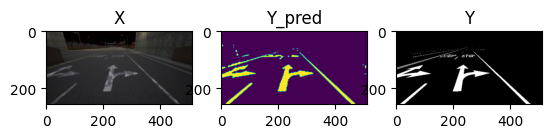

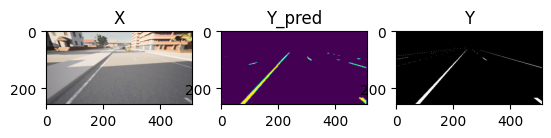

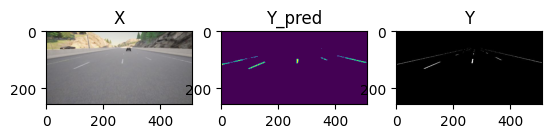

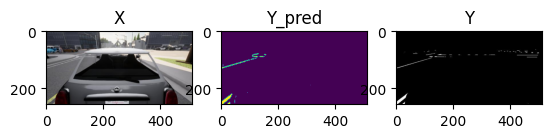

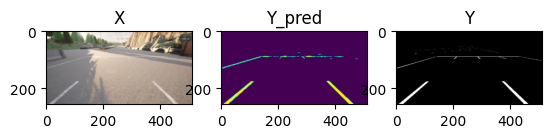

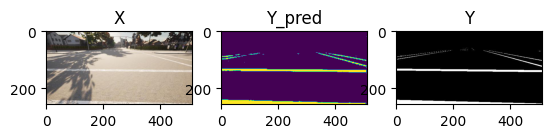

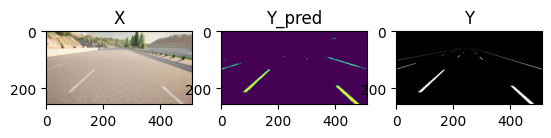

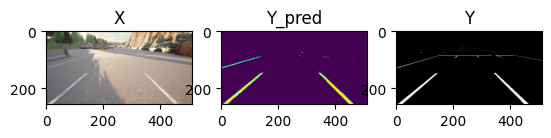

In [12]:
import matplotlib.pyplot as plt

for i in range(8):
    plt.subplot(1, 3, 1)
    plt.imshow(X[i])
    plt.title("X")

    plt.subplot(1, 3, 2)
    plt.imshow(Y_pred[i][:, :, 0])
    plt.title("Y_pred")

    plt.subplot(1, 3, 3)
    plt.imshow(Y[i])
    plt.title("Y")

    plt.show()